

# **Text Classification** 

##  Importing Dependencies
  

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer



from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


#  Dataset Preprocessing

In [ ]:
df = pd.read_csv('training.1600000.processed.noemoticon.csv',
                 encoding = 'latin',header=None)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/My Drive/training.1600000.processed.noemoticon.csv',
                 encoding = 'latin',header=None)
df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [4]:
df.columns = ['sentiment', 'id', 'date', 'query', 'user_id', 'text']
df.head()

,sentiment,id,date,query,user_id,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [5]:
df = df.drop(['id', 'date', 'query', 'user_id'], axis=1)

##### Encoding the sentimental values

In [6]:
lab_to_sentiment = {0:"Negative", 4:"Positive"}
def label_decoder(label):
  return lab_to_sentiment[label]
df.sentiment = df.sentiment.apply(lambda x: label_decoder(x))
df.head()

,sentiment,text
0,Negative,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,Negative,is upset that he can't update his Facebook by ...
2,Negative,@Kenichan I dived many times for the ball. Man...
3,Negative,my whole body feels itchy and like its on fire
4,Negative,"@nationwideclass no, it's not behaving at all...."


Text(0.5, 1.0, 'Sentiment Data Distribution')

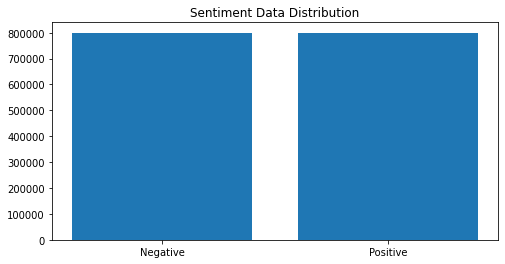

In [7]:
distribution = df.sentiment.value_counts()

plt.figure(figsize=(8,4))
plt.bar(distribution.index, distribution.values)
plt.title("Sentiment Data Distribution")

In [12]:
df

,sentiment,text
0,Negative,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,Negative,is upset that he can't update his Facebook by ...
2,Negative,@Kenichan I dived many times for the ball. Man...
3,Negative,my whole body feels itchy and like its on fire
4,Negative,"@nationwideclass no, it's not behaving at all...."
...,...,...
1599995,Positive,Just woke up. Having no school is the best fee...
1599996,Positive,TheWDB.com - Very cool to hear old Walt interv...
1599997,Positive,Are you ready for your MoJo Makeover? Ask me f...
1599998,Positive,Happy 38th Birthday to my boo of alll time!!! ...


# Feature Extraction(Non-AI Approach using NGrams and TFIdF vectorizer)


In [15]:
data_interested = df[df["sentiment"] == "Positive"]
data_interested = data_interested.reset_index(drop=True)

data_notinterested = df[df["sentiment"] == "Negative"]
data_notinterested = data_notinterested.reset_index(drop=True)

In [16]:
print("Interested data values ", data_interested.shape)
print("Not Interested data values ", data_notinterested.shape)

Interested data values  (800000, 2)
Not Interested data values  (800000, 2)


In [18]:
!pip install nlppreprocess

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
from nltk.tokenize import word_tokenize
from nlppreprocess import NLP
import spacy

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

sentences = data_interested["text"].to_list()

# Create TfidfVectorizer.
# stop_words : Get rid of english stop words. 
vectorizer = TfidfVectorizer(stop_words='english')

# Learn vocabulary from sentences. 
# vectorizer.fit_(sentences)
X = vectorizer.fit_transform(sentences)
feature_names = np.array(vectorizer.get_feature_names())

feature_array = np.array(vectorizer.get_feature_names())
tfidf_sorting = np.argsort(X.toarray()).flatten()[::-1]

n = 10
top_n = feature_array[tfidf_sorting][:n]  
print(top_n)

# Get vocabularies.
# vectorizer.vocabulary_

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
counts = pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names())
counts.T.sort_values(by=0, ascending=False).head(10)

In [ ]:
sentences = data_notinterested["Filtered Strings"].to_list()

# Create TfidfVectorizer.
# stop_words : Get rid of english stop words. 
vectorizer = TfidfVectorizer(stop_words='english')

# Learn vocabulary from sentences. 
# vectorizer.fit_(sentences)
X = vectorizer.fit_transform(sentences)
feature_names = np.array(vectorizer.get_feature_names())

feature_array = np.array(vectorizer.get_feature_names())
tfidf_sorting = np.argsort(X.toarray()).flatten()[::-1]

n = 10
top_n = feature_array[tfidf_sorting][:n]  
print(top_n)

# Get vocabularies.
# vectorizer.vocabulary_

In [ ]:
counts = pd.DataFrame(X.toarray(),
                      columns=vectorizer.get_feature_names())
counts.T.sort_values(by=0, ascending=False).head(10)

### BiGram

In [ ]:
corpus = data_interested["text"]
vectorizer = TfidfVectorizer(ngram_range = (2,2))

X2 = vectorizer.fit_transform(corpus)
scores = (X2.toarray())
features = (vectorizer.get_feature_names())

# print("\n\nScores : \n", scores)
  
sums = X2.sum(axis = 0)
data1 = []
for col, term in enumerate(features):
    data1.append( (term, sums[0,col] ))
ranking = pd.DataFrame(data1, columns = ['term','rank'])
words = (ranking.sort_values('rank', ascending = False))
print ("\n\nWords head : \n", words.head(7))

In [ ]:
corpus = data_notinterested["text"]
vectorizer = TfidfVectorizer(ngram_range = (2,2))

X2 = vectorizer.fit_transform(corpus)
scores = (X2.toarray())
features = (vectorizer.get_feature_names())

# print("\n\nScores : \n", scores)
  
sums = X2.sum(axis = 0)
data1 = []
for col, term in enumerate(features):
    data1.append( (term, sums[0,col] ))
ranking = pd.DataFrame(data1, columns = ['term','rank'])
words = (ranking.sort_values('rank', ascending = False))
print ("\n\nWords head : \n", words.head(7))

Here we took a non AI approach
sometimes it may be possible that some positive text may be in a form that phrases might repeated for example "Looks Good". So we ranked the words here, using tfidf vectorizer. 
This gives us the understanding that if theres a positive phrase, we can directly classify any text containing the positive phrase as a positive text. 
This is a heuristic approach, which utilizes, non-AI methods to identify the sentiments in the text. 
Here we created the interested and not_interested dataset because, the phrases associated with the respective datasets might be different. 


### Trigram

In [ ]:
corpus = data_interested["text"]
vectorizer = TfidfVectorizer(ngram_range = (3,3))

X2 = vectorizer.fit_transform(corpus)
scores = (X2.toarray())
features = (vectorizer.get_feature_names())

# print("\n\nScores : \n", scores)
  
sums = X2.sum(axis = 0)
data1 = []
for col, term in enumerate(features):
    data1.append( (term, sums[0,col] ))
ranking = pd.DataFrame(data1, columns = ['term','rank'])
words = (ranking.sort_values('rank', ascending = False))
print ("\n\nWords head : \n", words.head(7))

In [ ]:
corpus = data_notinterested["text"]
vectorizer = TfidfVectorizer(ngram_range = (3,3))

X2 = vectorizer.fit_transform(corpus)
scores = (X2.toarray())
features = (vectorizer.get_feature_names())

# print("\n\nScores : \n", scores)
  
sums = X2.sum(axis = 0)
data1 = []
for col, term in enumerate(features):
    data1.append( (term, sums[0,col] ))
ranking = pd.DataFrame(data1, columns = ['term','rank'])
words = (ranking.sort_values('rank', ascending = False))
print ("\n\nWords head : \n", words.head(7))

### Quadgram

In [ ]:
corpus = data_interested["text"]
vectorizer = TfidfVectorizer(ngram_range = (4,4))

X2 = vectorizer.fit_transform(corpus)
scores = (X2.toarray())
features = (vectorizer.get_feature_names())

# print("\n\nScores : \n", scores)
  
sums = X2.sum(axis = 0)
data1 = []
for col, term in enumerate(features):
    data1.append( (term, sums[0,col] ))
ranking = pd.DataFrame(data1, columns = ['term','rank'])
words = (ranking.sort_values('rank', ascending = False))
print ("\n\nWords head : \n", words.head(7))

In [ ]:
corpus = data_notinterested["text"]
vectorizer = TfidfVectorizer(ngram_range = (4,4))

X2 = vectorizer.fit_transform(corpus)
scores = (X2.toarray())
features = (vectorizer.get_feature_names())

# print("\n\nScores : \n", scores)
  
sums = X2.sum(axis = 0)
data1 = []
for col, term in enumerate(features):
    data1.append( (term, sums[0,col] ))
ranking = pd.DataFrame(data1, columns = ['term','rank'])
words = (ranking.sort_values('rank', ascending = False))
print ("\n\nWords head : \n", words.head(7))

## N-Gram rule engine
Based on the TFIDF vectorizer, we can create a rule engine which would take as input, the text and compare it with the respective n-grams, derived from the datasets. The reason for doing this is to create a faster and more robust non-AI approach which utilizes less resources to compute. 


# Text Preprocessing



### Stemming/ Lematization




In [ ]:
Cancel_words = stopwords.words('english')
stemmer = SnowballStemmer('english')

text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

In [ ]:
def preprocess(text, stem=False):
  text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
  tokens = []
  for token in text.split():
    if token not in Cancel_words:
      if stem:
        tokens.append(stemmer.stem(token))
      else:
        tokens.append(token)
  return " ".join(tokens)

In [ ]:
df.text = df.text.apply(lambda x: preprocess(x))


### Positive WordCloud

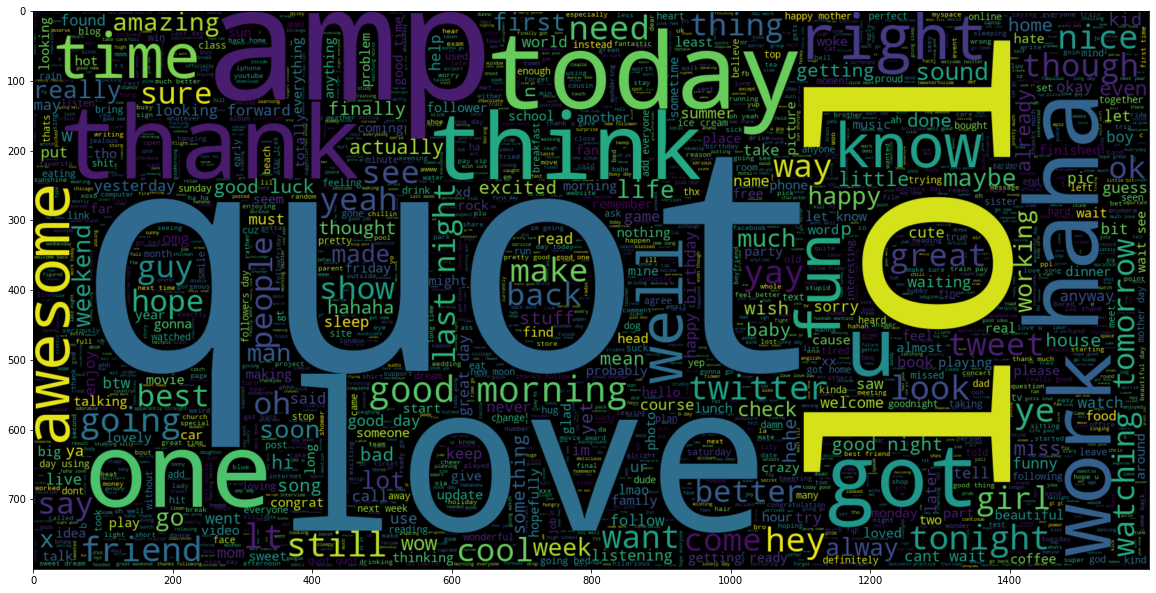

In [ ]:
from wordcloud import WordCloud

plt.figure(figsize = (20,20)) 
word_cloud = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.sentiment == 'Positive'].text))
plt.imshow(word_cloud , interpolation = 'bilinear')

### Negative WordCloud

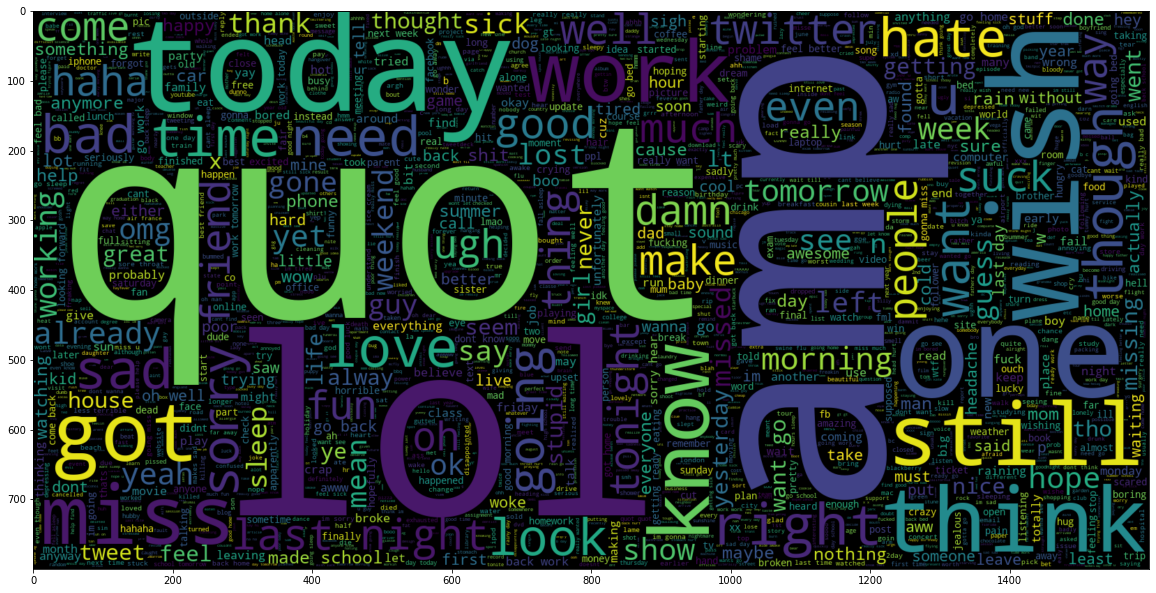

In [ ]:
plt.figure(figsize = (20,20)) 
word_cloud = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.sentiment == 'Negative'].text))
plt.imshow(word_cloud , interpolation = 'bilinear')

## Data Split

In [ ]:
TRAIN_SIZE = 0.8
MAX_NB_WORDS = 100000
MAX_SEQUENCE_LENGTH = 30

In [ ]:
train_data, test_data = train_test_split(df, test_size=1-TRAIN_SIZE,
                                         random_state=7)
print("Train Data size:", len(train_data))
print("Test Data size", len(test_data))

Train Data size: 1280000
Test Data size 320000


In [ ]:
train_data.head(20)

,sentiment,text
23786,Negative,need friends
182699,Negative,im trying call impossible
476661,Negative,good pace going 3k 13 min missed 5k turn ended...
1181490,Positive,u gonna shows ny soon luv see u live
878773,Positive,hell yea get em tattoos ink free wish parents ...
130866,Negative,yeah need 2 see ur mom calls back first rememb...
1235876,Positive,sounds like cup tea sign
717314,Negative,tired want sleep wtf
969880,Positive,amazing wish
748698,Negative,thank god wkrn abc affiliate nashville back mi...


# Tokenization


In [ ]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data.text)

index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary Size :", vocab_size)

Vocabulary Size : 290575


In [ ]:
from keras_preprocessing.sequence import pad_sequences

x_train = pad_sequences(tokenizer.texts_to_sequences(train_data.text),
                        maxlen = MAX_SEQUENCE_LENGTH)
x_test = pad_sequences(tokenizer.texts_to_sequences(test_data.text),
                       maxlen = MAX_SEQUENCE_LENGTH)

print("Training X Shape:",x_train.shape)
print("Testing X Shape:",x_test.shape)

Training X Shape: (1280000, 30)
Testing X Shape: (320000, 30)


In [ ]:
labels = train_data.sentiment.unique().tolist()

### Label Encoding 


In [ ]:
encoder = LabelEncoder()
encoder.fit(train_data.sentiment.to_list())

y_train = encoder.transform(train_data.sentiment.to_list())
y_test = encoder.transform(test_data.sentiment.to_list())

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

y_train shape: (1280000, 1)
y_test shape: (320000, 1)


# Word Emdedding


In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2022-11-17 15:44:45--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2022-11-17 15:44:45--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2022-11-17 15:44:46--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip.3’

gl

In [ ]:
GLOVE_EMB = 'glove.6B.300d.txt'
# here instead of 300 dimensions, we can use other embedding sizes for the dimensions lik e 200, 100 and 50
# here the number of dimensions is somewhat proportional to the accuracy of the model 
EMBEDDING_DIM = 300
LR = 1e-3
# here the learning rate is a also a tuneable parameter
BATCH_SIZE = 1024
# the increase in batch size would lead to more number of tweets being considered in a single batch
EPOCHS = 10
MODEL_PATH = 'best_model.hdf5'

In [ ]:
embeddings_index = {}

f = open(GLOVE_EMB)
for line in f:
  values = line.split()
  word = value = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' %len(embeddings_index))

Found 400000 word vectors.


In [ ]:
embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
for word, i in index.items():
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

In [ ]:
embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                          EMBEDDING_DIM,
                                          weights=[embedding_matrix],
                                          input_length=MAX_SEQUENCE_LENGTH,
                                          trainable=False)

# Model Training - LSTM


In [ ]:
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding_sequences = embedding_layer(sequence_input)
x = SpatialDropout1D(0.2)(embedding_sequences)
x = Conv1D(64, 5, activation='relu')(x)
x = Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2))(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(sequence_input, outputs)
# here the architecture can be changed so as to imporve accuracy by increasing the number of layers
# but this increases the probability of overfitting of train data

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

model.compile(optimizer=Adam(learning_rate=LR), loss='binary_crossentropy',
              metrics=['accuracy'])
ReduceLROnPlateau = ReduceLROnPlateau(factor=0.1,
                                     min_lr = 0.01,
                                     monitor = 'val_loss',
                                     verbose = 1)
# distributing the training process using callback 
# so as to improve the utility 

In [ ]:
print("Training on GPU...") if tf.test.is_gpu_available() else print("Training on CPU...")
# using GPUs can substantially reduce the time required to train the model 

Training on GPU...


In [ ]:
history = model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS,
                    validation_data=(x_test, y_test), callbacks=[ReduceLROnPlateau])

Epoch 1/10
1250/1250 [==============================] - 160s 124ms/step - loss: 0.5196 - accuracy: 0.7390 - val_loss: 0.4817 - val_accuracy: 0.7664 - lr: 0.0010
Epoch 2/10
1250/1250 [==============================] - 150s 120ms/step - loss: 0.4877 - accuracy: 0.7623 - val_loss: 0.4709 - val_accuracy: 0.7728 - lr: 0.0010
Epoch 3/10
1250/1250 [==============================] - 151s 121ms/step - loss: 0.4774 - accuracy: 0.7689 - val_loss: 0.4670 - val_accuracy: 0.7752 - lr: 0.0010
Epoch 4/10
1250/1250 [==============================] - 151s 121ms/step - loss: 0.4712 - accuracy: 0.7732 - val_loss: 0.4632 - val_accuracy: 0.7774 - lr: 0.0010
Epoch 5/10
1250/1250 [==============================] - 150s 120ms/step - loss: 0.4666 - accuracy: 0.7759 - val_loss: 0.4631 - val_accuracy: 0.7779 - lr: 0.0010
Epoch 6/10
1250/1250 [==============================] - 151s 120ms/step - loss: 0.4628 - accuracy: 0.7780 - val_loss: 0.4622 - val_accuracy: 0.7804 - lr: 0.0010
Epoch 7/10
1250/1250 [============

# Model Evaluation


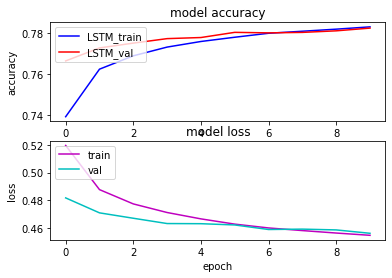

In [ ]:
s, (at, al) = plt.subplots(2,1)
at.plot(history.history['accuracy'], c= 'b')
at.plot(history.history['val_accuracy'], c='r')
at.set_title('model accuracy')
at.set_ylabel('accuracy')
at.set_xlabel('epoch')
at.legend(['LSTM_train', 'LSTM_val'], loc='upper left')

al.plot(history.history['loss'], c='m')
al.plot(history.history['val_loss'], c='c')
al.set_title('model loss')
al.set_ylabel('loss')
al.set_xlabel('epoch')
al.legend(['train', 'val'], loc = 'upper left')

The model will output a prediction score between 0 and 1. We can classify two classes by defining a threshold value for it. In our case, I have set 0.5 as THRESHOLD value, if the score above it. Then it will be classified as **POSITIVE** sentiment.

In [ ]:
def sentiment_score(score):
    return "Positive" if score>0.5 else "Negative"


scores = model.predict(x_test, verbose=1, batch_size=10000)
y_pred_1d = [sentiment_score(score) for score in scores]

32/32 [==============================] - 2s 65ms/step


In [ ]:
print(scores)

[[0.11749433]
 [0.25219455]
 [0.02575849]
 ...
 [0.2518915 ]
 [0.92726225]
 [0.9627938 ]]


### Confusion Matrix


In [ ]:
import itertools
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):

    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])

    if sum_stats:
        accuracy  = np.trace(cf) / float(np.sum(cf))

        if len(cf)==2:
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    if figsize==None:
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        categories=False


    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

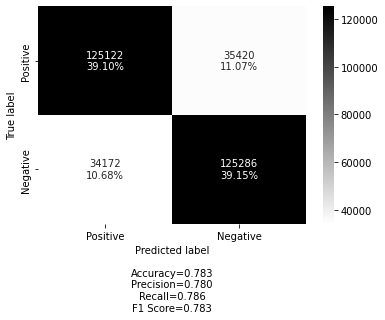

In [ ]:
matrix = confusion_matrix(test_data.sentiment.to_list(), y_pred_1d)
make_confusion_matrix(matrix, categories = ['Positive', 'Negative'], cmap='binary')

### Classification Scores

In [ ]:
print(classification_report(list(test_data.sentiment), y_pred_1d))

              precision    recall  f1-score   support

    Negative       0.79      0.78      0.78    160542
    Positive       0.78      0.79      0.78    159458

    accuracy                           0.78    320000
   macro avg       0.78      0.78      0.78    320000
weighted avg       0.78      0.78      0.78    320000



# Comparative analysis 


## Dense CNN

In [ ]:
dense_sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
dense_embedding_sequences = embedding_layer(dense_sequence_input)
x = SpatialDropout1D(0.2)(dense_embedding_sequences)
x = Conv1D(64, 5, activation='relu')(x)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)
dense_model = tf.keras.Model(dense_sequence_input, outputs)

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

dense_model.compile(optimizer=Adam(learning_rate=LR), loss='binary_crossentropy',
              metrics=['accuracy'])
ReduceLROnPlateau = ReduceLROnPlateau(factor=0.1,
                                     min_lr = 0.01,
                                     monitor = 'val_loss',
                                     verbose = 1)

In [ ]:
history = dense_model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS,
                    validation_data=(x_test, y_test), callbacks=[ReduceLROnPlateau])

Epoch 1/10
1250/1250 [==============================] - 61s 48ms/step - loss: 0.6727 - accuracy: 0.5443 - val_loss: 0.6734 - val_accuracy: 0.5473 - lr: 0.0010
Epoch 2/10
1250/1250 [==============================] - 59s 47ms/step - loss: 0.6691 - accuracy: 0.5478 - val_loss: 0.6718 - val_accuracy: 0.5483 - lr: 0.0010
Epoch 3/10
1250/1250 [==============================] - 60s 48ms/step - loss: 0.6681 - accuracy: 0.5485 - val_loss: 0.6707 - val_accuracy: 0.5488 - lr: 0.0010
Epoch 4/10
1250/1250 [==============================] - 61s 49ms/step - loss: 0.6675 - accuracy: 0.5494 - val_loss: 0.6712 - val_accuracy: 0.5483 - lr: 0.0010
Epoch 5/10
1250/1250 [==============================] - 60s 48ms/step - loss: 0.6671 - accuracy: 0.5495 - val_loss: 0.6703 - val_accuracy: 0.5494 - lr: 0.0010
Epoch 6/10
1250/1250 [==============================] - 60s 48ms/step - loss: 0.6668 - accuracy: 0.5501 - val_loss: 0.6704 - val_accuracy: 0.5494 - lr: 0.0010
Epoch 7/10
1250/1250 [========================

## Evaluating the Dense CNN model 


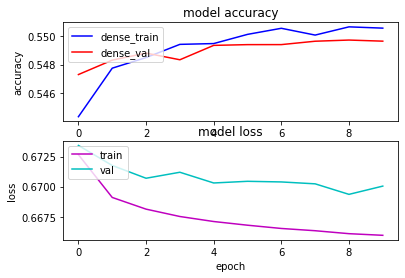

In [ ]:
s, (at, al) = plt.subplots(2,1)
at.plot(history.history['accuracy'], c= 'b')
at.plot(history.history['val_accuracy'], c='r')
at.set_title('model accuracy')
at.set_ylabel('accuracy')
at.set_xlabel('epoch')
at.legend(['dense_train', 'dense_val'], loc='upper left')

al.plot(history.history['loss'], c='m')
al.plot(history.history['val_loss'], c='c')
al.set_title('model loss')
al.set_ylabel('loss')
al.set_xlabel('epoch')
al.legend(['train', 'val'], loc = 'upper left')

In [ ]:
def sentiment_score(score):
     return "Positive" if score>0.5 else "Negative"

scores = dense_model.predict(x_test, verbose=1, batch_size=10000)
scores = scores.flatten()
scores = np.random.choice(scores, 320000)
y_pred_1d = [sentiment_score(score) for score in scores]

32/32 [==============================] - 5s 147ms/step


### Confusion Matrix

In [ ]:
import itertools
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):

    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

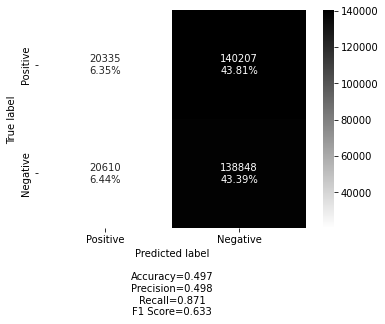

In [ ]:
matrix = confusion_matrix(test_data.sentiment.to_list(), y_pred_1d)
make_confusion_matrix(matrix, categories = ['Positive', 'Negative'], cmap='binary')

### Classification Scores

In [ ]:
print(classification_report(list(test_data.sentiment), y_pred_1d))

              precision    recall  f1-score   support

    Negative       0.50      0.13      0.20    160542
    Positive       0.50      0.87      0.63    159458

    accuracy                           0.50    320000
   macro avg       0.50      0.50      0.42    320000
weighted avg       0.50      0.50      0.42    320000

